In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.15.0'

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
pwd

'/content'

In [6]:
cd /content/drive/MyDrive/DL/VGG16

/content/drive/MyDrive/DL/VGG16


In [7]:
pwd

'/content/drive/MyDrive/DL/VGG16'

In [8]:
ls

test.p  traffic-signs-data.zip  train.p  valid.p  VGG16.ipynb


In [9]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [11]:
import wget

In [12]:
wget.download(link)

'traffic-signs-data (1).zip'

In [13]:
data = "./"

In [14]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [15]:
import pickle

In [16]:
with open(train_link, mode = "rb") as f:
  train = pickle.load(f)

In [17]:
with open(valid_link, mode = "rb") as f:
  valid = pickle.load(f)

In [18]:
with open(test_link, mode = "rb") as f:
  test = pickle.load(f)

In [19]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [20]:
trainX = train["features"]
trainY = train["labels"]

In [21]:
trainY

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [23]:
trainX.shape

(34799, 32, 32, 3)

In [27]:
trainX[0].shape

(32, 32, 3)

In [28]:
import matplotlib.pyplot as plt

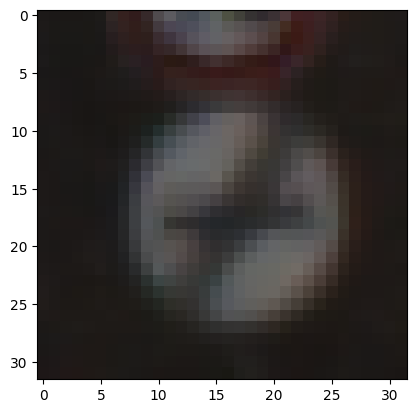

In [29]:
plt.imshow(trainX[0])

In [30]:
trainY[0]

41

In [31]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [32]:
classNames[trainY[0]]

'End of no passing'

In [33]:
from sklearn.utils import shuffle

In [34]:
trainX, trainY = shuffle(trainX, trainY)

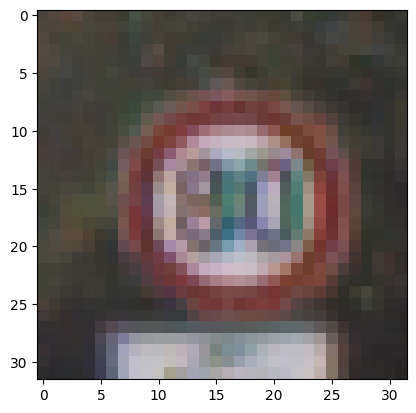

In [35]:
plt.imshow(trainX[0])

In [36]:
classNames[trainY[0]]

'Speed limit (80km/h)'

In [37]:
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]


In [38]:
trainX = trainX.astype("float")/255.0

In [39]:
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

In [40]:
trainX[0]

array([[[0.28235294, 0.26666667, 0.23921569],
        [0.32156863, 0.27058824, 0.23921569],
        [0.35686275, 0.27058824, 0.23921569],
        ...,
        [0.21568627, 0.18823529, 0.16078431],
        [0.19607843, 0.2       , 0.17647059],
        [0.21960784, 0.21960784, 0.2       ]],

       [[0.29803922, 0.27058824, 0.23529412],
        [0.30196078, 0.27058824, 0.22352941],
        [0.30980392, 0.27058824, 0.22352941],
        ...,
        [0.25490196, 0.23137255, 0.19607843],
        [0.20784314, 0.21176471, 0.18823529],
        [0.2       , 0.2       , 0.19215686]],

       [[0.31764706, 0.27843137, 0.24313725],
        [0.27843137, 0.25882353, 0.21960784],
        [0.26666667, 0.26666667, 0.22745098],
        ...,
        [0.25882353, 0.24313725, 0.22352941],
        [0.22745098, 0.23137255, 0.21568627],
        [0.2       , 0.20392157, 0.18431373]],

       ...,

       [[0.21568627, 0.19215686, 0.20392157],
        [0.19215686, 0.17647059, 0.18823529],
        [0.19215686, 0

In [41]:
from sklearn.preprocessing import LabelBinarizer

In [42]:
lb = LabelBinarizer()

In [43]:
trainY = lb.fit_transform(trainY)

In [44]:
validY = lb.fit_transform(validY)

In [52]:
trainY[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
valid["labels"][0]

41

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, AveragePooling2D, MaxPooling2D, Conv2D, Activation, Dropout, Flatten, Input, Dense, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
width = 32

In [ ]:
height = 32

In [ ]:
classes = 43

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3, 3), padding = "same", input_shape = shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3, 3), padding = "same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3, 3), padding = "same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding = "same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(43))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 10

In [ ]:
batch_size = 64

In [ ]:
opt = SGD(learning_rate = learning_rate, momentum = 0.9)

In [ ]:
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size = batch_size), validation_data = (validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs = epochs, verbose =1)

<ipython-input-93-d599b56d0005>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size = batch_size), validation_data = (validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs = epochs, verbose =1)


Epoch 1/10
543/543 [==============================] - 258s 466ms/step - loss: 2.0016 - accuracy: 0.4185 - val_loss: 1.7629 - val_accuracy: 0.4776
Epoch 2/10
543/543 [==============================] - 248s 457ms/step - loss: 0.8108 - accuracy: 0.7350 - val_loss: 1.2669 - val_accuracy: 0.6249
Epoch 3/10
543/543 [==============================] - 248s 457ms/step - loss: 0.3948 - accuracy: 0.8706 - val_loss: 0.9768 - val_accuracy: 0.7381
Epoch 4/10
543/543 [==============================] - 253s 467ms/step - loss: 0.2411 - accuracy: 0.9226 - val_loss: 0.9070 - val_accuracy: 0.7399
Epoch 5/10
543/543 [==============================] - 248s 457ms/step - loss: 0.1599 - accuracy: 0.9503 - val_loss: 0.6216 - val_accuracy: 0.8304
Epoch 6/10
543/543 [==============================] - 249s 458ms/step - loss: 0.1210 - accuracy: 0.9603 - val_loss: 0.7430 - val_accuracy: 0.7941
Epoch 7/10
543/543 [==============================] - 253s 465ms/step - loss: 0.0938 - accuracy: 0.9696 - val_loss: 0.6236 -